# Implement Linear Regression and calculate sum of residual error on the following datasets
---
* ### Y=4X+13+s(0,1)
* ### Y=10sin(X1)+15sin(X2)+s(0,1)
* ### Boston Housing Rate Dataset

## Where X is random variable with values [0,50] and s(0,1) Gaussian white noise of zero mean and unit variance. 
---
## Consider the following instructions:- 
* ### 1. Implement both the analytic matrix formulation and gradient descent on LMS (Least Mean square) loss formulation to compute the weight matrix and compare the results. 

* ### 2. For gradient Descent implement full batch, stochastic and mini batch stochastic formulations and compare the results. 

* ### 3. Consider the different values for learning rate in gradient descent and study their effect on convergence and thus implement decaying learning rate system. 

* ### 4. Plot the data points and the computed regression line for dataset- 1and dataset-2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load Boston Housing data from CSV file
def load_boston_data(file_path):
    data = pd.read_csv(file_path)
    # Assuming 'MEDV' is the target variable in the last column
    X_boston = data.iloc[:, :-1].values  # Features (CRIM to LSTAT)
    Y_boston = data.iloc[:, -1].values.reshape(-1, 1)  # Target (MEDV)
    return X_boston, Y_boston

# Load the data
X_boston, Y_boston = load_boston_data('BostonHousing.csv')


In [2]:
# Gaussian white noise generator
def noise(mean=0, std=1, size=1):
    return np.random.normal(mean, std, size)

# Dataset 1: Y = 4X + 13 + s(0,1)
X1 = np.random.uniform(0, 50, 100).reshape(-1, 1)
Y1 = 4 * X1 + 13 + noise(0, 1, X1.shape)

# Dataset 2: Y = 10sin(X1) + 15sin(X2) + s(0,1)
X2_1 = np.random.uniform(0, 50, 100).reshape(-1, 1)
X2_2 = np.random.uniform(0, 50, 100).reshape(-1, 1)
Y2 = 10 * np.sin(X2_1) + 15 * np.sin(X2_2) + noise(0, 1, X2_1.shape)


In [3]:
def analytical_solution(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

# Add bias term to each dataset
X1_bias = np.hstack([np.ones((X1.shape[0], 1)), X1])
X2_bias = np.hstack([np.ones((X2_1.shape[0], 1)), X2_1, X2_2])
X_boston_bias = np.hstack([np.ones((X_boston.shape[0], 1)), X_boston])

# Calculate weights
W_analytical_1 = analytical_solution(X1_bias, Y1)
W_analytical_2 = analytical_solution(X2_bias, Y2)
W_analytical_boston = analytical_solution(X_boston_bias, Y_boston)


In [4]:
# Define Gradient Descent Variants
def gradient_descent(X, Y, learning_rate=0.01, iterations=1000, decay=False):
    m, n = X.shape
    W = np.zeros((n, 1))
    for i in range(iterations):
        predictions = X @ W
        error = predictions - Y
        gradients = (1 / m) * X.T @ error
        W -= learning_rate * gradients
        if decay:
            learning_rate *= (1.0 / (1.0 + 0.01 * i))
    return W

def stochastic_gradient_descent(X, Y, learning_rate=0.01, iterations=1000, decay=False):
    m, n = X.shape
    W = np.zeros((n, 1))
    for i in range(iterations):
        for j in range(m):
            random_index = np.random.randint(m)
            Xi = X[random_index:random_index + 1]
            Yi = Y[random_index:random_index + 1]
            predictions = Xi @ W
            error = predictions - Yi
            gradients = Xi.T @ error
            W -= learning_rate * gradients
            if decay:
                learning_rate *= (1.0 / (1.0 + 0.01 * i))
    return W

def mini_batch_gradient_descent(X, Y, learning_rate=0.01, iterations=1000, batch_size=20, decay=False):
    m, n = X.shape
    W = np.zeros((n, 1))
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        for j in range(0, m, batch_size):
            Xi = X_shuffled[j:j+batch_size]
            Yi = Y_shuffled[j:j+batch_size]
            predictions = Xi @ W
            error = predictions - Yi
            gradients = (1 / batch_size) * Xi.T @ error
            W -= learning_rate * gradients
        if decay:
            learning_rate *= (1.0 / (1.0 + 0.01 * i))
    return W


In [5]:
# Compute weights using Gradient Descent methods for Dataset 1
W_gd_1 = gradient_descent(X1_bias, Y1)
W_sgd_1 = stochastic_gradient_descent(X1_bias, Y1)
W_mgd_1 = mini_batch_gradient_descent(X1_bias, Y1)

# Compute weights for Dataset 2
W_gd_2 = gradient_descent(X2_bias, Y2)
W_sgd_2 = stochastic_gradient_descent(X2_bias, Y2)
W_mgd_2 = mini_batch_gradient_descent(X2_bias, Y2)

# Compute weights for Boston dataset
W_gd_boston = gradient_descent(X_boston_bias, Y_boston)
W_sgd_boston = stochastic_gradient_descent(X_boston_bias, Y_boston)
W_mgd_boston = mini_batch_gradient_descent(X_boston_bias, Y_boston)

# Calculate sum of residual errors for each method
def residual_sum(X, Y, W):
    predictions = X @ W
    residuals = Y - predictions
    return np.sum(np.abs(residuals))

# Print results
print("Residual error for Analytical Solution (Dataset 1):", residual_sum(X1_bias, Y1, W_analytical_1))
print("Residual error for Gradient Descent (Dataset 1):", residual_sum(X1_bias, Y1, W_gd_1))
print("Residual error for Stochastic Gradient Descent (Dataset 1):", residual_sum(X1_bias, Y1, W_sgd_1))
print("Residual error for Mini-Batch Gradient Descent (Dataset 1):", residual_sum(X1_bias, Y1, W_mgd_1))

# Similar print statements for Dataset 2 and Boston dataset...


C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:8: RuntimeWarning: overflow encountered in matmul
  gradients = (1 / m) * X.T @ error
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:9: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradients
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:24: RuntimeWarning: overflow encountered in matmul
  gradients = Xi.T @ error
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:25: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradients
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:42: RuntimeWarning: overflow encountered in matmul
  gradients = (1 / batch_size) * Xi.T @ error
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:43: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradients
C:\Users\cryst\AppData\Local\Temp\ipykernel_7204\4023343701.py:24: RuntimeWarning: invali

Residual error for Analytical Solution (Dataset 1): 78.66714918994717
Residual error for Gradient Descent (Dataset 1): nan
Residual error for Stochastic Gradient Descent (Dataset 1): nan
Residual error for Mini-Batch Gradient Descent (Dataset 1): nan


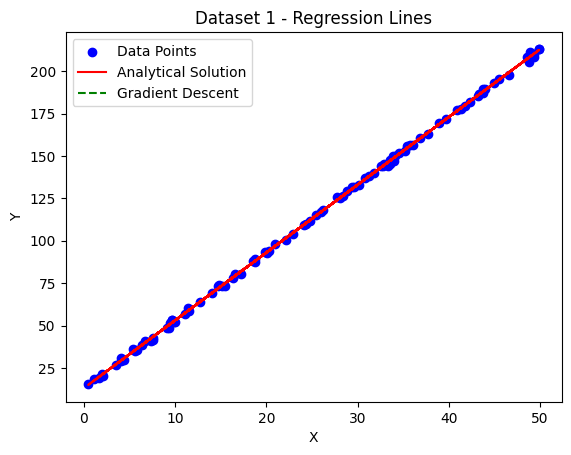

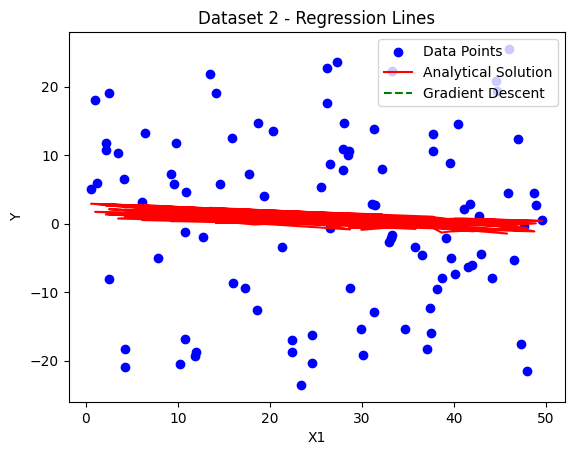

In [8]:
# Plot for Dataset 1
plt.scatter(X1, Y1, color='blue', label='Data Points')
plt.plot(X1, X1_bias @ W_analytical_1, color='red', label='Analytical Solution')
plt.plot(X1, X1_bias @ W_gd_1, color='green', linestyle='--', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset 1 - Regression Lines')
plt.show()

# Plot for Dataset 2
plt.scatter(X2_1, Y2, color='blue', label='Data Points')
plt.plot(X2_1, X2_bias @ W_analytical_2, color='red', label='Analytical Solution')
plt.plot(X2_1, X2_bias @ W_gd_2, color='green', linestyle='--', label='Gradient Descent')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset 2 - Regression Lines')
plt.show()
